In [1]:
import pandas as pd
from src.data_preprocessing import load_data, preprocess_data, split_data
from src.model_training import train_model
from src.model_predict import predict_future_demand
import os
import time

In [2]:
print("离散制造行业产品物料需求智能预测")
print("\n" + "=" * 50)

# 创建models目录（如果不存在）
if not os.path.exists('models'):
    print("创建models目录...")
    os.makedirs('models')

# 加载历史需求数据
print("\n[1/4] 数据加载阶段")
demand_data = load_data('data/demand_train.csv')

print("\n数据加载完成！")

print("\n" + "=" * 50)


离散制造行业产品物料需求智能预测


[1/4] 数据加载阶段

数据加载完成！



In [3]:
# 预处理数据
print("\n[2/4] 数据预处理阶段")
processed_demand = preprocess_data(demand_data)


[2/4] 数据预处理阶段

开始数据预处理流程

[1/7] 日期转换
开始转换日期格式...
日期转换完成

[2/7] 处理负数需求量
开始处理负数需求量...
负数需求量处理完成

[3/7] 去除重复数据
开始去除重复数据...
发现 1109582 条重复数据

重复数据示例（前10行）：
         过账日期  工厂编码  物料编码   需求量
10 2018-01-22  2008  1000  0.06
11 2018-01-22  2008  1000  0.06
33 2018-04-06  2004  1000  0.23
34 2018-04-06  2004  1000  0.20
35 2018-04-09  2004  1000  0.80
36 2018-04-09  2004  1000  0.44
37 2018-04-10  2004  1000  0.79
38 2018-04-10  2004  1000  0.03
42 2018-04-21  2004  1000  0.45
43 2018-04-21  2004  1000  0.03

去重后数据量: 248503 条
重复数据去除完成

[4/7] 添加时间特征
开始添加时间特征...
时间特征添加完成

[5/7] 添加滞后特征
开始添加滞后特征...
滞后特征添加完成

[6/7] 添加滑动窗口特征
开始添加滑动窗口特征...
滑动窗口特征添加完成

[7/7] 归一化特征
开始归一化特征...
特征归一化完成

清理数据...
清理完成，最终数据量: 248503 条

特征列表：
['过账日期', '需求量', '工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类', '月份', '日期', '星期几', '季度', '是否月初', '是否月末', '1天前需求量', '1天前需求量变化率', '3天前需求量', '3天前需求量变化率', '7天前需求量', '7天前需求量变化率', '14天前需求量', '14天前需求量变化率', '30天前需求量', '30天前需求量变化率', '3天平均需求量', '3天需求量标准差', '3天最小需求量', '3天最大需求量', '3天平均需求量变化率', '7天平均需求量', '7


[3/4] 模型训练阶段

开始数据集划分

训练集大小: 224472 样本
测试集大小: 24031 样本
特征数量: 41

特征列表:
['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类', '月份', '日期', '星期几', '季度', '是否月初', '是否月末', '1天前需求量', '1天前需求量变化率', '3天前需求量', '3天前需求量变化率', '7天前需求量', '7天前需求量变化率', '14天前需求量', '14天前需求量变化率', '30天前需求量', '30天前需求量变化率', '3天平均需求量', '3天需求量标准差', '3天最小需求量', '3天最大需求量', '3天平均需求量变化率', '7天平均需求量', '7天需求量标准差', '7天最小需求量', '7天最大需求量', '7天平均需求量变化率', '14天平均需求量', '14天需求量标准差', '14天最小需求量', '14天最大需求量', '14天平均需求量变化率', '30天平均需求量', '30天需求量标准差', '30天最小需求量', '30天最大需求量', '30天平均需求量变化率']

数据集划分完成

开始模型训练...
训练集大小: (224472, 41)
测试集大小: (24031, 41)
数据特征：Index(['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类', '月份', '日期', '星期几', '季度', '是否月初',
       '是否月末', '1天前需求量', '1天前需求量变化率', '3天前需求量', '3天前需求量变化率', '7天前需求量',
       '7天前需求量变化率', '14天前需求量', '14天前需求量变化率', '30天前需求量', '30天前需求量变化率',
       '3天平均需求量', '3天需求量标准差', '3天最小需求量', '3天最大需求量', '3天平均需求量变化率', '7天平均需求量',
       '7天需求量标准差', '7天最小需求量', '7天最大需求量', '7天平均需求量变化率', '14天平均需求量', '14天需求量标准差',
       '14天最小需求量', '14天最大需求量', '14天平均需

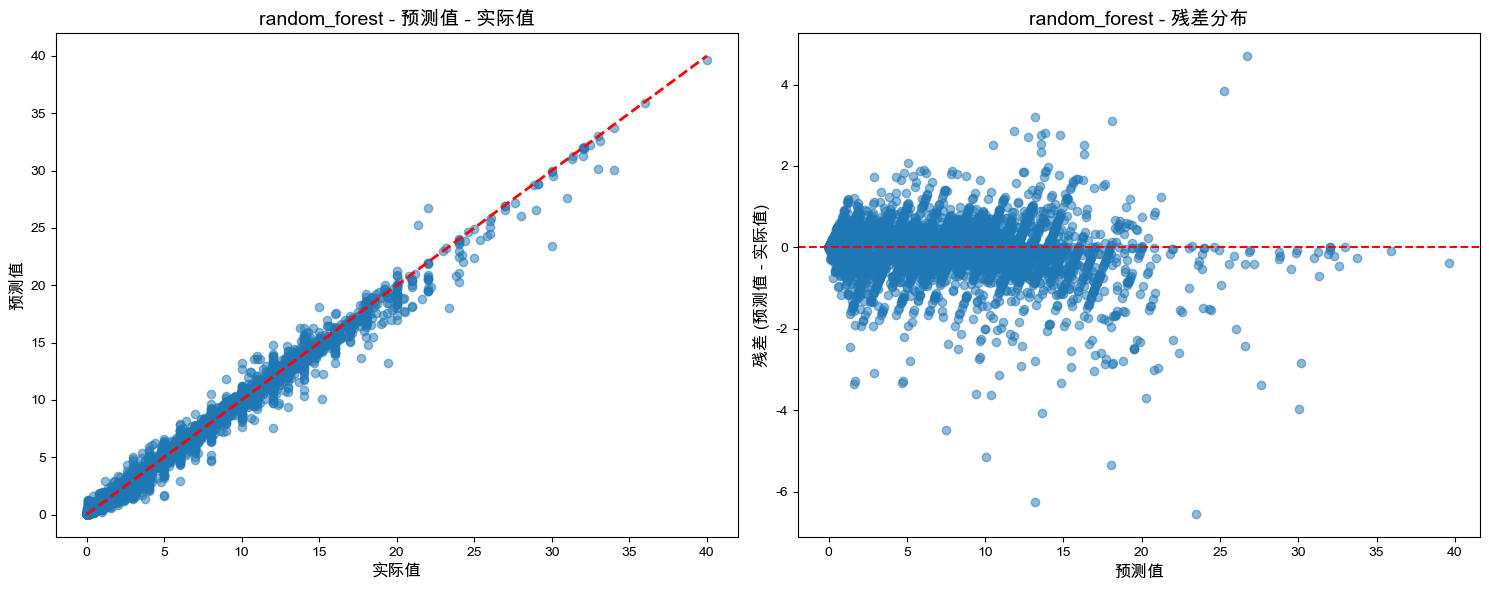


random_forest 模型预测结果（含原始特征）已保存到: output/random_forest_test_predictions_20250522_215716.csv

数据预览（前5行）:
         工厂编码  物料编码  物料品牌  物料类型  物料品类  月份  日期  星期几  季度  是否月初  ...  14天最小需求量  \
1074535  2000  1001  5000  3002  4006   9  18    4   3     0  ...  0.243152   
1118561  2000  1001  5000  3002  4006  10  13    1   4     0  ...  0.243152   
1135194  2000  1001  5000  3002  4006  10  23    4   4     0  ...  0.243152   
1157699  2000  1001  5000  3002  4006  11   7    5   4     0  ...  0.243152   
1169278  2000  1001  5000  3002  4006  11  15    6   4     0  ...  0.243152   

         14天最大需求量  14天平均需求量变化率  30天平均需求量  30天需求量标准差  30天最小需求量  30天最大需求量  \
1074535 -0.308771    -0.035025  0.234010   0.344877  0.500961  0.596565   
1118561 -0.308771    -0.035105  0.161558   0.263285  0.500961  0.596565   
1135194 -0.308771     0.119099  0.138186   0.249901  0.500961  0.596565   
1157699 -0.308771    -0.166968  0.107803   0.237649  0.500961  0.596565   
1169278 -0.308771     0.077595  0.058722   0.1

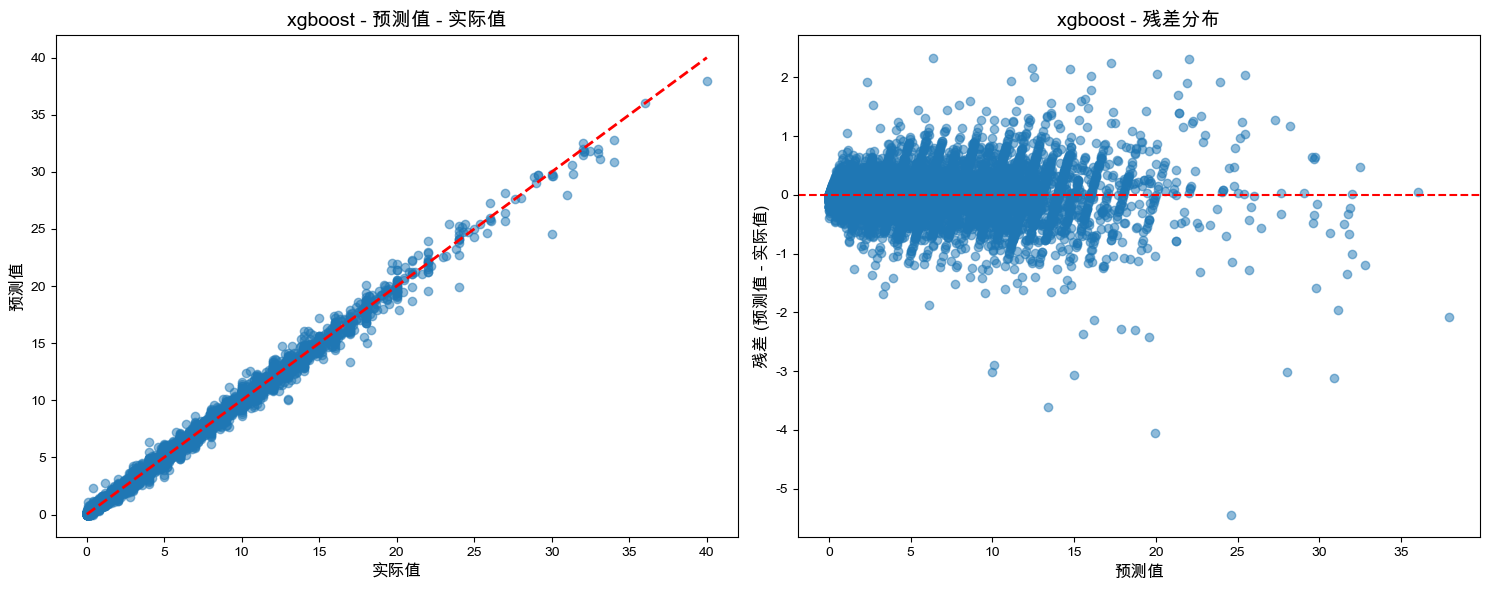


xgboost 模型预测结果（含原始特征）已保存到: output/xgboost_test_predictions_20250522_215716.csv

数据预览（前5行）:
         工厂编码  物料编码  物料品牌  物料类型  物料品类  月份  日期  星期几  季度  是否月初  ...  14天最小需求量  \
1074535  2000  1001  5000  3002  4006   9  18    4   3     0  ...  0.243152   
1118561  2000  1001  5000  3002  4006  10  13    1   4     0  ...  0.243152   
1135194  2000  1001  5000  3002  4006  10  23    4   4     0  ...  0.243152   
1157699  2000  1001  5000  3002  4006  11   7    5   4     0  ...  0.243152   
1169278  2000  1001  5000  3002  4006  11  15    6   4     0  ...  0.243152   

         14天最大需求量  14天平均需求量变化率  30天平均需求量  30天需求量标准差  30天最小需求量  30天最大需求量  \
1074535 -0.308771    -0.035025  0.234010   0.344877  0.500961  0.596565   
1118561 -0.308771    -0.035105  0.161558   0.263285  0.500961  0.596565   
1135194 -0.308771     0.119099  0.138186   0.249901  0.500961  0.596565   
1157699 -0.308771    -0.166968  0.107803   0.237649  0.500961  0.596565   
1169278 -0.308771     0.077595  0.058722   0.181387  0.500

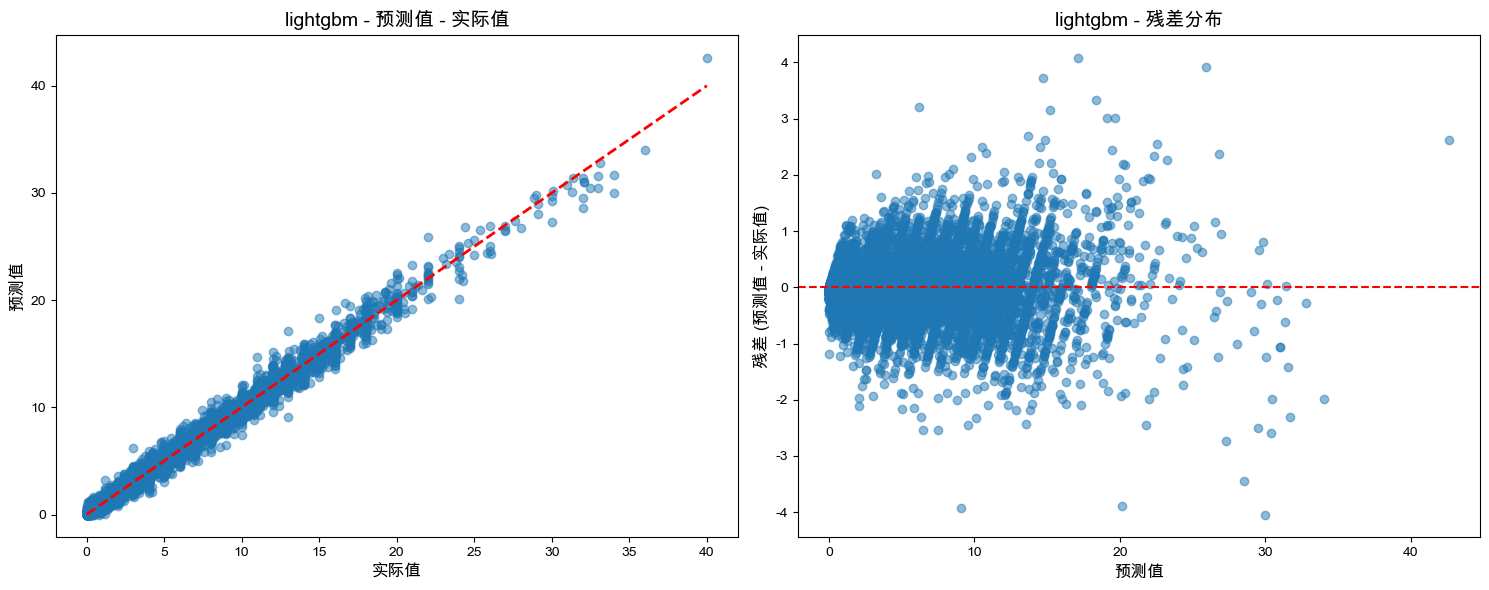


lightgbm 模型预测结果（含原始特征）已保存到: output/lightgbm_test_predictions_20250522_215716.csv

数据预览（前5行）:
         工厂编码  物料编码  物料品牌  物料类型  物料品类  月份  日期  星期几  季度  是否月初  ...  14天最小需求量  \
1074535  2000  1001  5000  3002  4006   9  18    4   3     0  ...  0.243152   
1118561  2000  1001  5000  3002  4006  10  13    1   4     0  ...  0.243152   
1135194  2000  1001  5000  3002  4006  10  23    4   4     0  ...  0.243152   
1157699  2000  1001  5000  3002  4006  11   7    5   4     0  ...  0.243152   
1169278  2000  1001  5000  3002  4006  11  15    6   4     0  ...  0.243152   

         14天最大需求量  14天平均需求量变化率  30天平均需求量  30天需求量标准差  30天最小需求量  30天最大需求量  \
1074535 -0.308771    -0.035025  0.234010   0.344877  0.500961  0.596565   
1118561 -0.308771    -0.035105  0.161558   0.263285  0.500961  0.596565   
1135194 -0.308771     0.119099  0.138186   0.249901  0.500961  0.596565   
1157699 -0.308771    -0.166968  0.107803   0.237649  0.500961  0.596565   
1169278 -0.308771     0.077595  0.058722   0.181387  0.5

In [4]:
# 训练预测模型
print("\n[3/4] 模型训练阶段")
best_model, trained_models = train_model(*split_data(processed_demand))


In [5]:
print("\n[4/4] 需求预测阶段")
predictions = predict_future_demand(best_model, processed_demand)


[4/4] 需求预测阶段
开始预测未来需求...
共有 962 个工厂-物料组合需要预测


预测进度:   0%|          | 0/962 [00:00<?, ?it/s]


ValueError: feature_names mismatch: ['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类', '月份', '日期', '星期几', '季度', '是否月初', '是否月末', '1天前需求量', '1天前需求量变化率', '3天前需求量', '3天前需求量变化率', '7天前需求量', '7天前需求量变化率', '14天前需求量', '14天前需求量变化率', '30天前需求量', '30天前需求量变化率', '3天平均需求量', '3天需求量标准差', '3天最小需求量', '3天最大需求量', '3天平均需求量变化率', '7天平均需求量', '7天需求量标准差', '7天最小需求量', '7天最大需求量', '7天平均需求量变化率', '14天平均需求量', '14天需求量标准差', '14天最小需求量', '14天最大需求量', '14天平均需求量变化率', '30天平均需求量', '30天需求量标准差', '30天最小需求量', '30天最大需求量', '30天平均需求量变化率'] ['month', 'day', '工厂编码', '物料编码']
expected 30天前需求量, 星期几, 3天前需求量, 是否月末, 14天平均需求量, 14天最小需求量, 物料类型, 3天需求量标准差, 物料品类, 30天需求量标准差, 30天平均需求量, 物料品牌, 7天平均需求量, 日期, 3天前需求量变化率, 季度, 7天需求量标准差, 7天最小需求量, 14天平均需求量变化率, 14天需求量标准差, 3天最小需求量, 7天平均需求量变化率, 3天平均需求量, 30天平均需求量变化率, 1天前需求量, 30天最小需求量, 月份, 14天前需求量, 是否月初, 30天前需求量变化率, 3天平均需求量变化率, 7天最大需求量, 7天前需求量变化率, 14天最大需求量, 3天最大需求量, 14天前需求量变化率, 30天最大需求量, 7天前需求量, 1天前需求量变化率 in input data
training data did not have the following fields: day, month